<a href="https://colab.research.google.com/github/NamNT36/Artifical-Intelligence/blob/main/nhandien_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nhận diện 5 loại hoa **

1.   Rose(hoa hồng)
2.   Lotus(hoa sen)
3.   Water lily(hoa súng)
4.   Apricot(hoa mai)
5.   Daisy(hoa cúc)

In [15]:
#Khai báo thư viện

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU
#-----------------------------------------------------------------------------#
from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split
#-----------------------------------------------------------------------------#
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [16]:
#Đường dẫn file train
%cd /content/drive/MyDrive/gk/flowers/train

/content/drive/MyDrive/gk/flowers/train


In [17]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory('/content/drive/MyDrive/gk/flowers/train', target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices

Found 200 images belonging to 5 classes.


{'apricot': 0, 'daisy': 1, 'lotus': 2, 'rose': 3, 'water lily': 4}

In [18]:
#Tạo mô hình Sequential
model=Sequential()

#Tích chập 1
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))

#Tích chập 2
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

#Tích chập 3
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten())    #Làm phẳng thành vecto

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 128)     

In [19]:
#Bắt đầu huấn luyện
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=30, batch_size=256, verbose=1)  #verbose=1 -> hiển thị quá trình học ra

Epoch 1/30
7/7 [==============================] - 4s 304ms/step - loss: 25.8432 - accuracy: 0.1800
Epoch 2/30
7/7 [==============================] - 3s 485ms/step - loss: 1.4980 - accuracy: 0.4750
Epoch 3/30
7/7 [==============================] - 3s 374ms/step - loss: 0.9783 - accuracy: 0.6200
Epoch 4/30
7/7 [==============================] - 3s 380ms/step - loss: 0.7326 - accuracy: 0.6950
Epoch 5/30
7/7 [==============================] - 3s 412ms/step - loss: 0.5491 - accuracy: 0.7900
Epoch 6/30
7/7 [==============================] - 4s 584ms/step - loss: 0.4305 - accuracy: 0.8650
Epoch 7/30
7/7 [==============================] - 3s 423ms/step - loss: 0.3266 - accuracy: 0.8950
Epoch 8/30
7/7 [==============================] - 3s 396ms/step - loss: 0.3133 - accuracy: 0.8900
Epoch 9/30
7/7 [==============================] - 3s 397ms/step - loss: 0.2083 - accuracy: 0.9250
Epoch 10/30
7/7 [==============================] - 4s 544ms/step - loss: 0.1760 - accuracy: 0.9250
Epoch 11/30
7/7 [=

In [20]:
#Show độ chính xác và độ mất mát 
Score=model.evaluate(Train,verbose=0)
print('Độ Mất Mát: ', Score[0])
print('Độ Chính Xác: ', Score[1])

Độ Mất Mát:  0.02936519868671894
Độ Chính Xác:  0.9850000143051147


In [21]:
#Lưu file
model.save('/content/drive/MyDrive/gk/save_train/flowers.h5')

In [22]:
#Load file
model_1 = load_model('/content/drive/MyDrive/gk/save_train/flowers.h5')

1/1 [==============================] - 0s 72ms/step
Đây là  : apricot


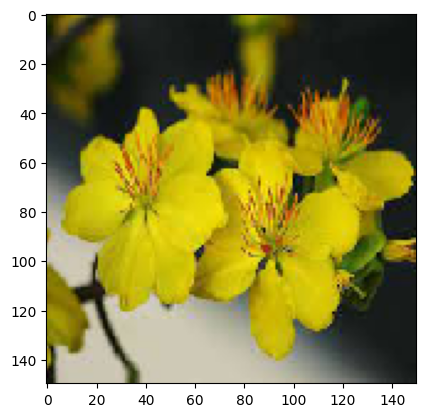

1/1 [==============================] - 0s 19ms/step
Đây là  : daisy


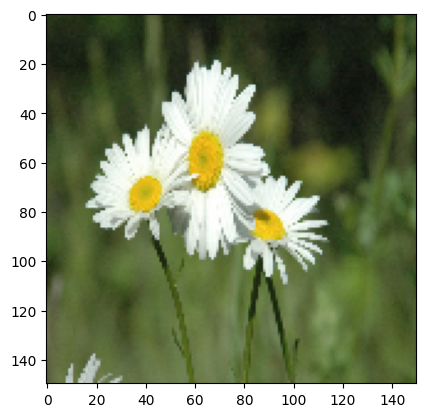

1/1 [==============================] - 0s 21ms/step
Đây là  : rose


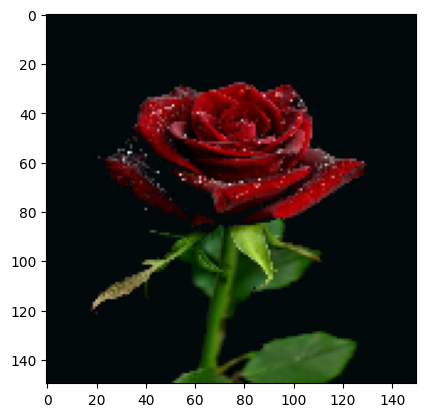

1/1 [==============================] - 0s 21ms/step
Đây là  : lotus


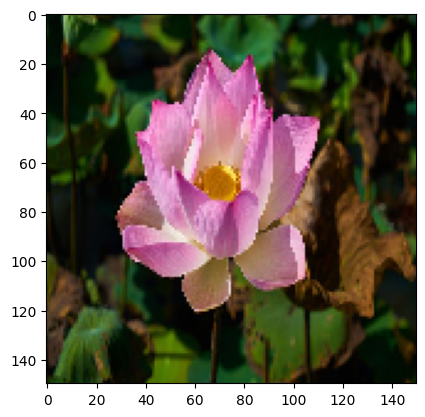

1/1 [==============================] - 0s 19ms/step
Đây là  : water lily


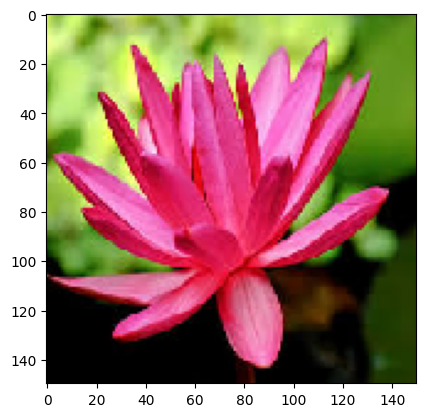

In [23]:
#Test(nhận dạng 5 loại hoa)
folder='/content/drive/MyDrive/gk/flowers/test/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['apricot', 'daisy', 'lotus', 'rose', 'water lily']
  print('Đây là  : {}'.format(class_name[result]))
  plt.show()